# Visualizing the positive semi-definite Cone

Math is explained here:
https://math.stackexchange.com/questions/1875462/how-to-plot-the-psd-cone-in-matlab

and here:
https://math.stackexchange.com/questions/3018639/off-diagonal-entries-of-a-symmetric-positive-semi-definite-matrix-prove-a-ij

or in the main blog post, of course.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

%matplotlib notebook

### Cut a marginal through the cone

In [2]:
def is_pos_def(x):
    eig = np.linalg.eigvals(x)
    pd = np.all(eig > 0)
    if not pd:
        raise(ValueError("Psi matrix is not positive definite! Matrix: {}; Eigenvalues: {}".format(x, eig)))
    else:
        return(True)

def make_2D_psd_cone_cut(a_11, a_22, rho):
    xx = []
    
    for i in range(len(a_11)):
        a_12 = rho*np.sqrt(a_11[i] * a_22[i])
        matrix = np.array([[a_11[i], a_12],[a_12, a_22[i]]])
        is_pos_def(matrix)
        xx.append(matrix)
        
    return(xx)

a_11 = np.linspace(0.01, 0.99, 100 +1)
a_22 = np.linspace(0.01, 0.99, 100 +1)

xx = make_2D_psd_cone_cut(a_11, a_22, 0.5)
xx2 = make_2D_psd_cone_cut(a_11, a_22, 0)
xx3 = make_2D_psd_cone_cut(a_11, a_22, -0.99)
#print(xx)

<IPython.core.display.Javascript object>


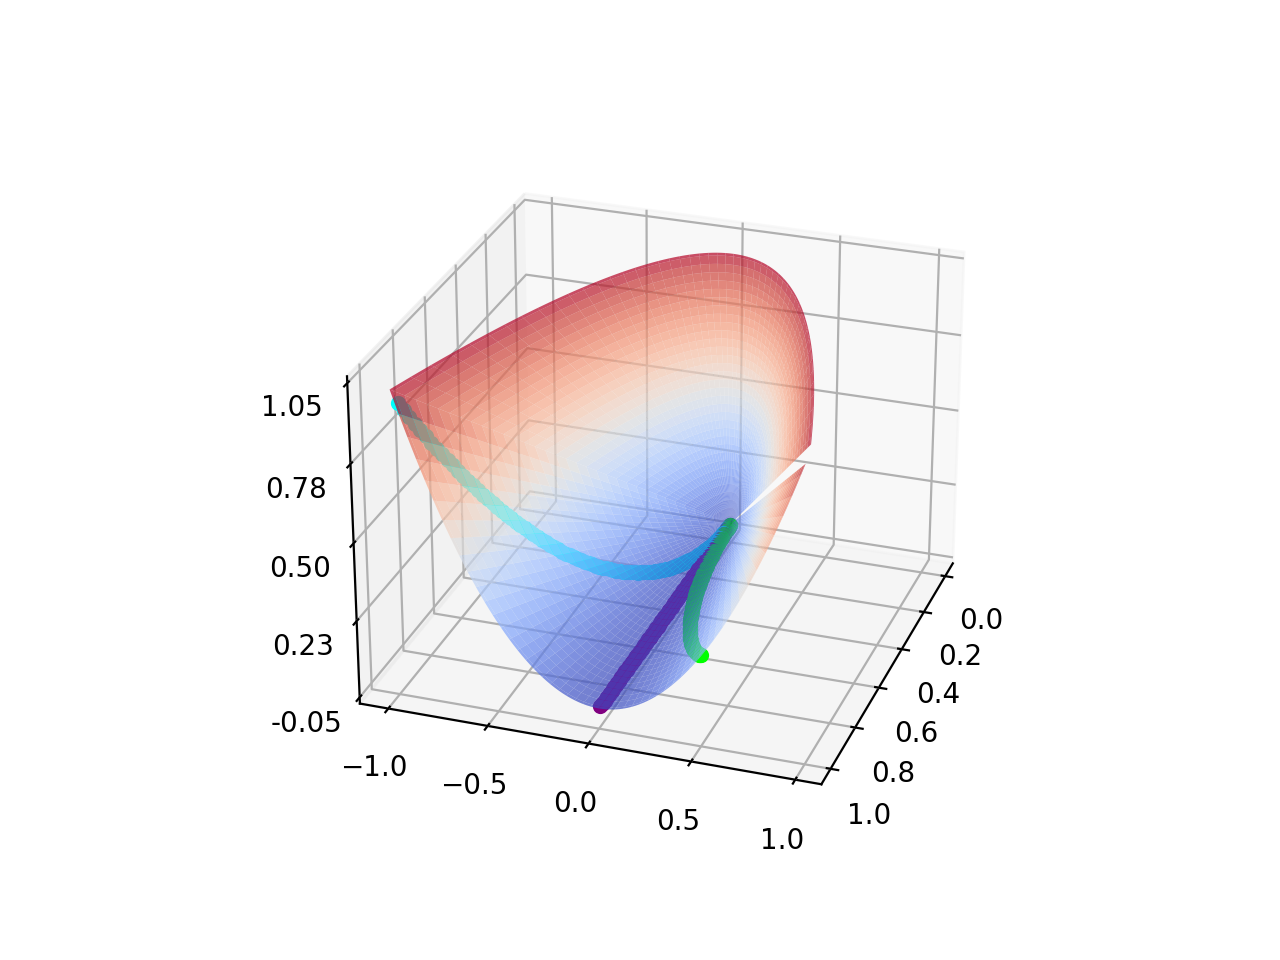

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 1.01, 0.01)
Y_ = np.arange(-1, 1, 0.02)
X, Y_ = np.meshgrid(X, Y_)
Y = X * Y_
Z = X * Y_**2

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.5, antialiased=True, alpha=0.7)
ax.plot_surface(Z, Y, X, cmap=cm.coolwarm,
                       linewidth=0.5, antialiased=True, alpha=0.7)

# plot the cut
for x in xx:
    #ax.scatter(x[0,0], x[0,1], x[0,1]**2)
    ax.scatter(x[0,0], x[0,0]*x[0,1], x[0,0]*x[0,1]**2, color='lime')
    
for x in xx2:
    ax.scatter(x[0,0], x[0,0]*x[0,1], x[0,0]*x[0,1]**2, color='purple')
    
for x in xx3:
    ax.scatter(x[0,0], x[0,0]*x[0,1], x[0,0]*x[0,1]**2, color='cyan')
    
# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


plt.show()